In [15]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from Classes.NeuralNetwork import NeuralNetwork

# Aufgabe 1

In [16]:
#load Train- and Test-Dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Convert images and labels to NumPy arrays
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()

test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()

## Train Dataset

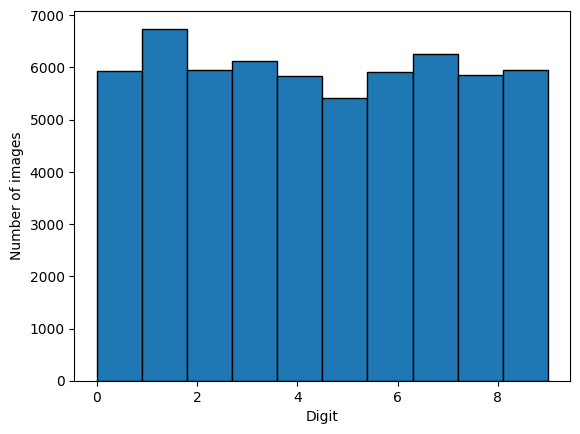

In [17]:
plt.hist(train_labels, edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Number of images')
plt.show()

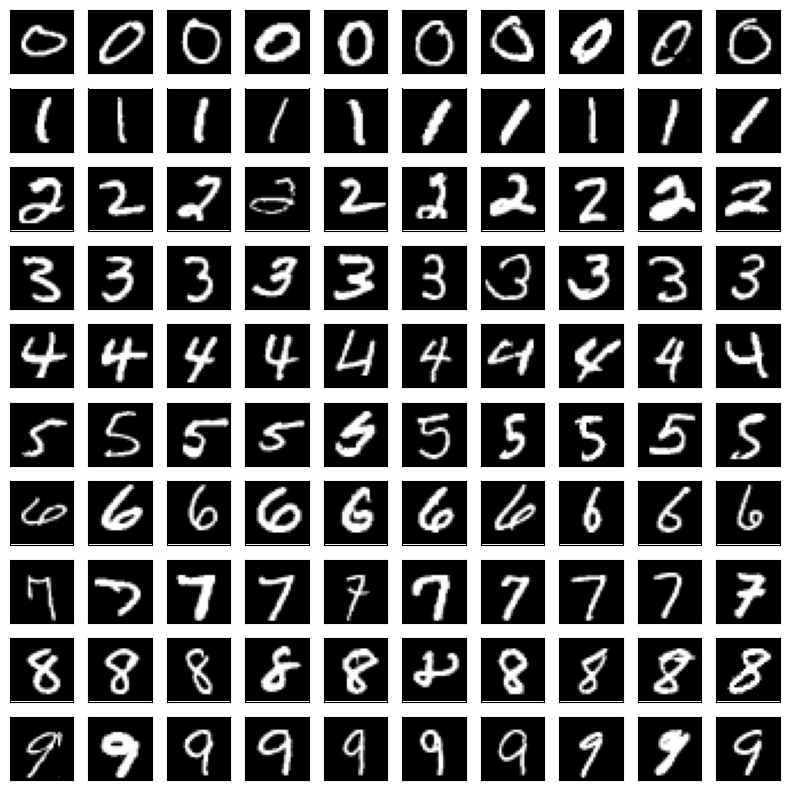

In [18]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))

# Iterate over subplots and display corresponding images from train_images
for i in range(10):
    for j in range(10):
        matching_indices = (train_labels == i).nonzero()[0]
        if len(matching_indices) > 0:
            idx = matching_indices[np.random.randint(len(matching_indices))]
            image = train_images[idx]
        else:
            # If no images for this digit, use a blank image
            image = np.zeros_like(train_images[0])

        # Display the image on the subplot
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Test Dataset

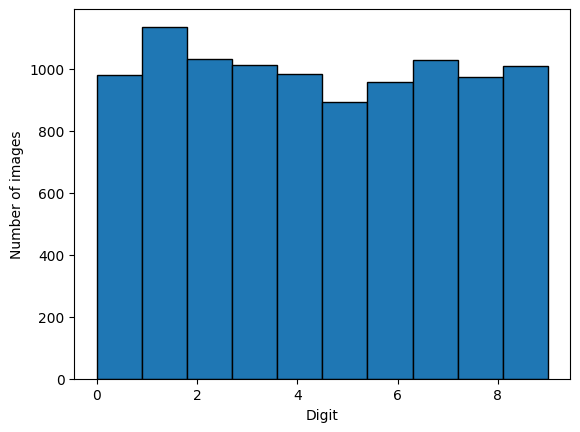

In [19]:
plt.hist(test_labels, edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Number of images')
plt.show()

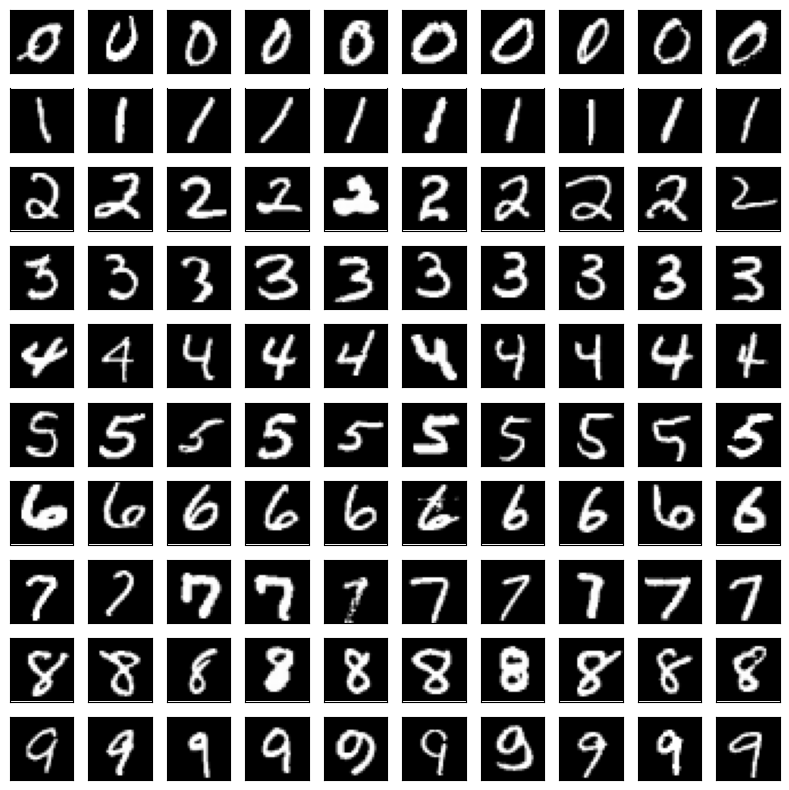

In [20]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))

# Iterate over subplots and display corresponding images from train_images
for i in range(10):
    for j in range(10):
        matching_indices = (test_labels == i).nonzero()[0]
        if len(matching_indices) > 0:
            idx = matching_indices[np.random.randint(len(matching_indices))]
            image = test_images[idx]
        else:
            # If no images for this digit, use a blank image
            image = np.zeros_like(test_images[0])

        # Display the image on the subplot
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Aufgabe 2

## Testfälle für die LinearLayer-Klasse

### Test des Forward-Passes

Die Funktion `test_forward_pass` testet die Forward-Pass-Berechnung der `LinearLayer`.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`

Die erwartete Ausgabe `A_expected` wird wie folgt berechnet:

$$
A_{\text{expected}} = \text{Eingabe} \cdot \text{Gewichte}^T + \text{Bias}
$$

Durch manuelles Berechnen der Matrixoperationen:

$$
A_{\text{expected}} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.3 \\ 0.2 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix} = \begin{bmatrix} 1.0 & 1.6 \\ 2.1 & 3.5 \end{bmatrix}
$$

Der Test bestätigt, dass die tatsächliche Ausgabe mit der erwarteten Ausgabe übereinstimmt.

### Test des Backward-Passes

Die Funktion `test_backward_pass` testet den Backward-Pass, bei dem die Gradienten in Bezug auf die Eingabe und Parameter berechnet werden.

Gegeben:
- Eingabedaten: `[[1, 2], [3, 4]]`
- Gewichte: `[[0.1, 0.2], [0.3, 0.4]]`
- Bias: `[[0.5], [1.0]]`
- Ausgabegradient (willkürlich für den Test): `[[0.5, 0.6], [0.7, 0.8]]`

#### Berechnung der erwarteten Gradienten

##### Eingabegradient (expected_dA)

Der Eingabegradient `expected_dA` wird als Produkt des Ausgabegradienten und der Gewichte berechnet:

$$
\text{expected\_dA} = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \times \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}
$$

$$
\text{expected\_dA} = \begin{bmatrix} 0.23 & 0.34 \\ 0.31 & 0.46 \end{bmatrix}
$$

##### Gewichtegradient (expected_weight_gradient)

Der Gewichtegradient `expected_weight_gradient` wird als Produkt der transponierten Eingabedaten und des Ausgabegradienten berechnet:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 0.5 & 0.7 \\ 0.6 & 0.8 \end{bmatrix}^T \times \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Nach der Korrektur und Neuberechnung:

$$
\text{expected\_weight\_gradient} = \begin{bmatrix} 2.6 & 3.8 \\ 3.0 & 4.4 \end{bmatrix}
$$

##### Biasgradient (expected_bias_gradient)

Der Biasgradient `expected_bias_gradient` ist die Summe des Ausgabegradienten entlang der ersten Achse (Summierung der Zeilen):

$$
\text{expected\_bias\_gradient} = \sum \text{output\_gradient} \text{ (axis=0)}
$$

$$
\text{expected\_bias\_gradient} = \begin{bmatrix} 1.2 \\ 1.4 \end{bmatrix}
$$

### Test der Parameteraktualisierung

Die Funktion `test_parameter_update` testet die Aktualisierung von Parametern mithilfe von Gradienten und einer Lernrate.

Gegeben:
- Anfängliche Gewichte: `[[0.5, 0.7], [0.3, 0.4]]`
- Anfänglicher Bias: `[[0.1], [0.2]]`
- Gewichtegradient: `[[-0.2, 0.1], [0.3, -0.1]]`
- Biasgradient: `[[-0.05], [0.03]]`
- Lernrate: `0.1`

Die erwarteten aktualisierten Gewichte und Bias werden wie folgt berechnet:

$$
\text{Erwartete Gewichte} = \text{Anfängliche Gewichte} - \text{Lernrate} \times \text{Gewichtegradient}
$$
$$
\text{Erwarteter Bias} = \text{Anfänglicher Bias} - \text{Lernrate} \times \text{Biasgradient}
$$

Durch manuelle Anwendung der Aktualisierungsregel:

$$
\text{Erwartete Gewichte} = \begin{bmatrix} 0.5 & 0.7 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.2 & 0.1 \\ 0.3 & -0.1 \end{bmatrix}
$$
$$
\text{Erwarteter Bias} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.05 \\ 0.03 \end{bmatrix}
$$

Der Test bestätigt, dass die Funktion zur Parameteraktualisierung die Gewichte und den Bias entsprechend den Gradienten und der Lernrate korrekt anpasst.


# Aufgabe 3

In [21]:
# Normalize images
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Convert labels for binary classification (1 for digit 5, 0 for all other digits)
digit = 5
train_labels = (train_labels == digit).astype(np.float32).reshape(-1, 1)
test_labels = (test_labels == digit).astype(np.float32).reshape(-1, 1)

# Flatten the images for simplicity (28x28 to 784)
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

## Kostenfunktion (Loss Function)

Für binäre Klassifikationsaufgaben ist die binäre Kreuzentropie (Binary Cross-Entropy, BCE) eine häufig verwendete Kostenfunktion. Sie ist definiert als:

$$
BCE(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

Hierbei ist:
- $N$ die Anzahl der Beispiele im Datensatz,
- $y_i$ der tatsächliche Labelwert (0 oder 1) und
- $\hat{y}_i$ der vom Netzwerk vorhergesagte Wert.

Diese Funktion ist besonders geeignet, weil sie die Wahrscheinlichkeit, die durch die Sigmoid-Aktivierungsfunktion des Output-Knotens modelliert wird, direkt berücksichtigt und Strafen für falsche Klassifikationen auf eine Art und Weise anwendet, die gut mit dem Optimierungsprozess zusammenarbeitet.



## Evaluationsfunktion (Evaluation Function)

Für die Bewertung der Modellleistung bei binärer Klassifikation ist die Genauigkeit (Accuracy) eine intuitive Metrik:

$$
\text{Accuracy} = \frac{\text{Anzahl der korrekt klassifizierten Beispiele}}{\text{Gesamtanzahl der Beispiele}}
$$

Diese Metrik ist einfach zu verstehen und gibt den Anteil der korrekt vorhergesagten Beispiele an der Gesamtzahl der Beispiele an.


## Alternative Optionen
Eine Alternative zur binären Kreuzentropie ist der Mean Squared Error (MSE), der jedoch weniger geeignet für Klassifikationsprobleme ist, da die Interpretation der Outputs als Wahrscheinlichkeiten nicht direkt berücksichtigt wird. MSE ist auch empfindlicher gegenüber Ausreißern, was zu einem langsameren Konvergenzverhalten führen kann.

Als alternative Evaluationsfunktion könnten Metriken wie Precision, Recall und F1-Score betrachtet werden, besonders wenn der Datensatz unausgeglichen ist. Diese Metriken geben einen detaillierteren Einblick in die Leistung des Klassifikators, was in manchen Anwendungsfällen vorteilhaft sein kann.

In [22]:
def compute_accuracy(predictions, labels):
    predictions = predictions > 0.5  # Convert probabilities to binary predictions
    return np.mean(predictions == labels)  # Compute mean accuracy

In [23]:
def binary_cross_entropy(prediction, targets):
    epsilon = 1e-10  # to prevent log(0)
    prediction = np.clip(prediction, epsilon, 1 - epsilon)
    return -np.mean(targets * np.log(prediction) + (1 - targets) * np.log(1 - prediction))

In [24]:
def train_model(model, train_images, train_labels, test_images, test_labels, epochs, patience, batch_size):
    best_test_loss = float('inf')
    wait = 0
    train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []

    for epoch in range(epochs):
        # Shuffle the training data
        permutation = np.random.permutation(train_images.shape[0])
        train_images_shuffled = train_images[permutation]
        train_labels_shuffled = train_labels[permutation]

        # Mini-batch gradient descent
        for i in range(0, train_images.shape[0], batch_size):
            batch_train_images = train_images_shuffled[i:i + batch_size]
            batch_train_labels = train_labels_shuffled[i:i + batch_size]

            # Forward pass
            predictions = model.forward_pass(batch_train_images)
            train_loss = binary_cross_entropy(predictions, batch_train_labels)
            error_propagation = predictions - batch_train_labels
            gradients = model.backward_pass(batch_train_images, error_propagation)
            
            # Update model parameters
            hidden_gradients, output_gradients = gradients
            model.parameter_update(hidden_gradients, output_gradients)

        # Evaluation on the entire training data
        train_predictions = model.forward_pass(train_images)
        full_train_loss = binary_cross_entropy(train_predictions, train_labels)
        full_train_accuracy = compute_accuracy(train_predictions, train_labels)

        # Evaluation on the entire test data
        test_predictions = model.forward_pass(test_images)
        test_loss = binary_cross_entropy(test_predictions, test_labels)
        test_accuracy = compute_accuracy(test_predictions, test_labels)

        # Store metrics
        train_losses.append(full_train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(full_train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print progress
        print(f'Epoch {epoch + 1}, Train Loss: {full_train_loss}, Test Loss: {test_loss}, '
              f'Train Accuracy: {full_train_accuracy}, Test Accuracy: {test_accuracy}')

        # Early stopping based on test loss
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            wait = 0  # Reset wait counter
        else:
            wait += 1
        if wait >= patience:
            print(f"Stopping early due to lack of improvement in test loss at epoch {epoch + 1}.")
            break

    return train_losses, test_losses, train_accuracies, test_accuracies

In [25]:
input_dim = 784  # 28*28
hidden_dim = 128
output_dim = 1
hidden_layers = 1
learning_rate = 0.01

model = NeuralNetwork(input_dim, hidden_dim, output_dim, hidden_layers, learning_rate)

In [26]:
epochs = 20
patience = 5
batch_size = 64

train_losses, test_losses, train_accuracies, test_accuracies = train_model(
    model, train_images, train_labels, test_images, test_labels, epochs, patience, batch_size
)

Epoch 1, Train Loss: 0.10404874014243533, Test Loss: 0.09721480392305908, Train Accuracy: 0.9701333333333333, Test Accuracy: 0.9726
Epoch 2, Train Loss: 0.09771565378529438, Test Loss: 0.092308986604733, Train Accuracy: 0.97095, Test Accuracy: 0.9729
Epoch 3, Train Loss: 0.09690774071448739, Test Loss: 0.09284914531852334, Train Accuracy: 0.97075, Test Accuracy: 0.9737
Epoch 4, Train Loss: 0.0988576089518382, Test Loss: 0.09283275837729527, Train Accuracy: 0.9695666666666667, Test Accuracy: 0.9728
Epoch 5, Train Loss: 0.09398735971273944, Test Loss: 0.08831735219068387, Train Accuracy: 0.9697833333333333, Test Accuracy: 0.9729
Epoch 6, Train Loss: 0.09550292654088918, Test Loss: 0.09050274841782248, Train Accuracy: 0.9662833333333334, Test Accuracy: 0.9686
Epoch 7, Train Loss: 0.09347471016750006, Test Loss: 0.08983419893293271, Train Accuracy: 0.96915, Test Accuracy: 0.972
Epoch 8, Train Loss: 0.09301730612486983, Test Loss: 0.0893862699126984, Train Accuracy: 0.9679333333333333, Test

## Aufgabe 4

In [27]:
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]


## Aufgabe 5